# <font color='#6495ED'>k-Nearest Neighbors (kNN) model</font>


How can a KNN model help us predict which customers will or will not accept a credit card offer?


compare smote with not smote

In [88]:


#data handling and transformation
import pandas as pd
import numpy as np

# data visualisation 
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.metrics import roc_curve
import plotly.graph_objects as go
import plotly.express as px



# machine learning metrics and scoring
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import cross_val_score



# machine learning models 
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# kNN
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier # knn modeling 

import warnings

warnings.filterwarnings('ignore')




In [34]:
# import cleaned data with original samples
X = pd.read_csv(r'./../data/X.csv') # import the csv file using a relative path to the 'data' folder

#X= X.drop(columns=['Unnamed: 0']) # drop index column

y = pd.read_csv(r'./../data/y.csv') # import the csv file using a relative path to the 'data' folder
#y= y.drop(columns=['Unnamed: 0']) # drop index column


#import oversampled data with StandardScaler applied
oversampled_data = pd.read_csv(r'./../data/oversampled_data.csv') # import the csv file using a relative path to the 'data' folder


In [72]:

# convert yes and no to 1 and 0
oversampled_data['offer_accepted'] = oversampled_data['offer_accepted'].replace({'No': 0, 'Yes': 1}) 


oversampled_data.head()


,bank_accounts_open,credit_cards_held,homes_owned,household_size,average_balance,q1_balance,q2_balance,q3_balance,q4_balance,income_level,...,reward_Air Miles,reward_Cash Back,reward_Points,mailer_type_Letter,mailer_type_Postcard,overdraft_protection_No,overdraft_protection_Yes,own_your_home_No,own_your_home_Yes,offer_accepted
0,-0.541352,0.121161,-0.476212,0.449452,0.628724,1.223349,-0.267589,0.095704,0.343147,1.410295,...,1.404533,-0.707372,-0.70198,1.016378,-1.016378,0.418213,-0.418213,1.354744,-1.354744,0
1,-0.541352,0.121161,1.863330,1.346760,-2.264609,-1.405430,-1.953241,-1.741902,-0.794628,-0.005039,...,1.404533,-0.707372,-0.70198,1.016378,-1.016378,0.418213,-0.418213,-0.738147,0.738147,0
2,1.575537,0.121161,-0.476212,-1.345162,-1.895627,-0.876449,-1.415407,-1.620841,-1.016458,1.410295,...,1.404533,-0.707372,-0.70198,-0.983886,0.983886,0.418213,-0.418213,-0.738147,0.738147,0
3,1.575537,-1.133443,-0.476212,0.449452,0.795015,1.076589,1.662932,0.139070,-0.699813,-0.005039,...,1.404533,-0.707372,-0.70198,1.016378,-1.016378,0.418213,-0.418213,1.354744,-1.354744,0
4,-0.541352,0.121161,-0.476212,2.244067,0.772177,1.982953,0.781845,-0.108474,-0.796417,-0.005039,...,1.404533,-0.707372,-0.70198,1.016378,-1.016378,0.418213,-0.418213,-0.738147,0.738147,0


## <font color='#6495ED'>Training the K-NN model</font>


How can a KNN model help us predict which customers will or will not accept a credit card offer?


## Splitting data intro train and test sets.

In [73]:
X = oversampled_data.drop('offer_accepted', axis = 1)
y = oversampled_data['offer_accepted']

In [74]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

[[0], [1], [2], [3]]

In [76]:
knn5 = KNeighborsClassifier(n_neighbors = 5)
knn1 = KNeighborsClassifier(n_neighbors=1)

In [77]:
knn5.fit(X_train, y_train)
knn1.fit(X_train, y_train)

y_pred_5 = knn5.predict(X_test)
y_pred_1 = knn1.predict(X_test)

In [78]:
from sklearn.metrics import confusion_matrix, classification_report

# Calculate the confusion matrix and classification report for knn5
cm_knn5 = confusion_matrix(y_test, y_pred_5)
cr_knn5 = classification_report(y_test, y_pred_5)
print("Confusion matrix for knn5:\n", cm_knn5)
print("Classification report for knn5:\n", cr_knn5)

# Calculate the confusion matrix and classification report for knn1
cm_knn1 = confusion_matrix(y_test, y_pred_1)
cr_knn1 = classification_report(y_test, y_pred_1)
print("Confusion matrix for knn1:\n", cm_knn1)
print("Classification report for knn1:\n", cr_knn1)


Confusion matrix for knn5:
 [[3808 1336]
 [  14 5015]]
Classification report for knn5:
               precision    recall  f1-score   support

           0       1.00      0.74      0.85      5144
           1       0.79      1.00      0.88      5029

    accuracy                           0.87     10173
   macro avg       0.89      0.87      0.87     10173
weighted avg       0.89      0.87      0.87     10173

Confusion matrix for knn1:
 [[4434  710]
 [  33 4996]]
Classification report for knn1:
               precision    recall  f1-score   support

           0       0.99      0.86      0.92      5144
           1       0.88      0.99      0.93      5029

    accuracy                           0.93     10173
   macro avg       0.93      0.93      0.93     10173
weighted avg       0.93      0.93      0.93     10173



In [79]:
from sklearn.metrics import accuracy_score
print("Accuracy with k=5", accuracy_score(y_test, y_pred_5)*100)
print("Accuracy with k=1", accuracy_score(y_test, y_pred_1)*100)

Accuracy with k=5 86.72957829548805
Accuracy with k=1 92.69635309151676


In [80]:

knn_model = KNeighborsRegressor(n_neighbors=4) # The keyword "n_neighbors" is what sets the K.
knn_model.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=4)

In [81]:
knn_predictions = knn_model.predict(X_test)
knn_predictions

array([0.  , 1.  , 1.  , ..., 0.25, 1.  , 1.  ])

In [89]:
k_values = [i for i in range (1,31)]
scores = []

scaler = StandardScaler()
X = scaler.fit_transform(X)

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn, X, y, cv=5)
    scores.append(np.mean(score))

Text(0, 0.5, 'Accuracy Score')

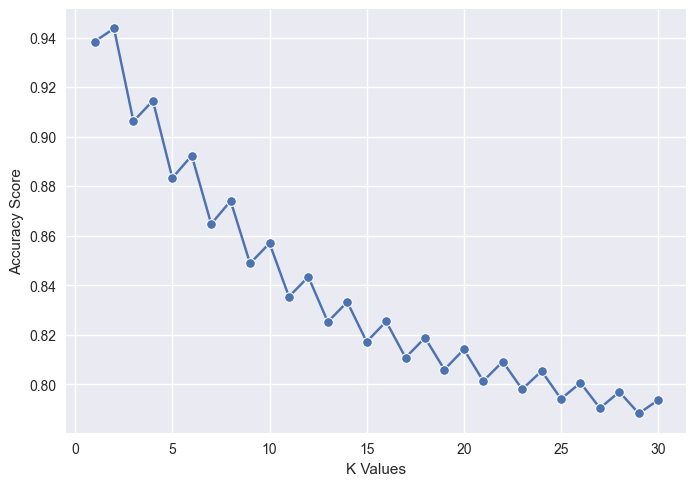

In [90]:
sns.lineplot(x = k_values, y = scores, marker = 'o')
plt.xlabel("K Values")
plt.ylabel("Accuracy Score")

In [ ]:
error = []

# Calculating MAE error for K values between 1 and 39
for i in range(1, 40):
    knn = KNeighborsRegressor(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    mae = mean_absolute_error(y_test, pred_i)
    error.append(mae)

Text(0, 0.5, 'Mean Absolute Error')

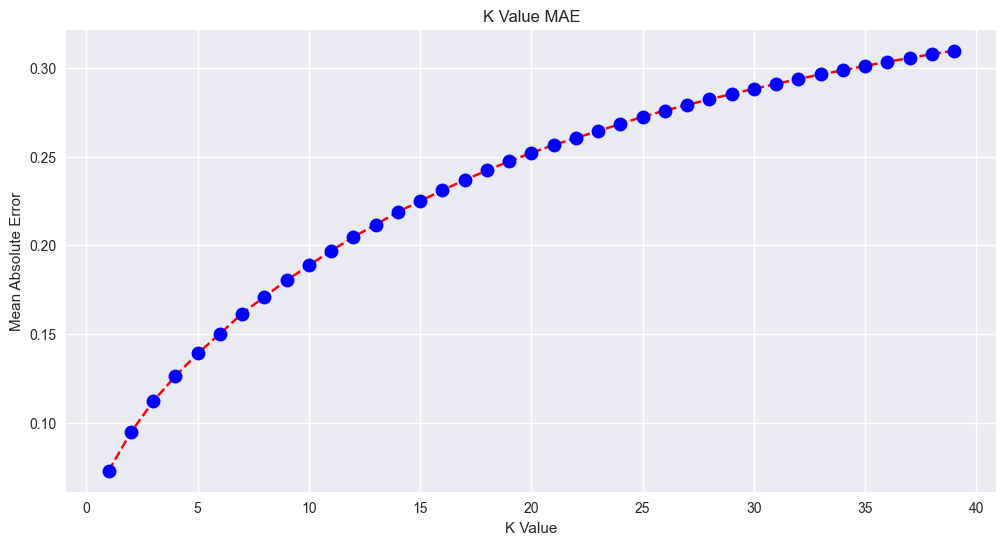

In [95]:
import matplotlib.pyplot as plt 

plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', 
         linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
         
plt.title('K Value MAE')
plt.xlabel('K Value')
plt.ylabel('Mean Absolute Error')

Text(0, 0.5, 'Mean Absolute Error')

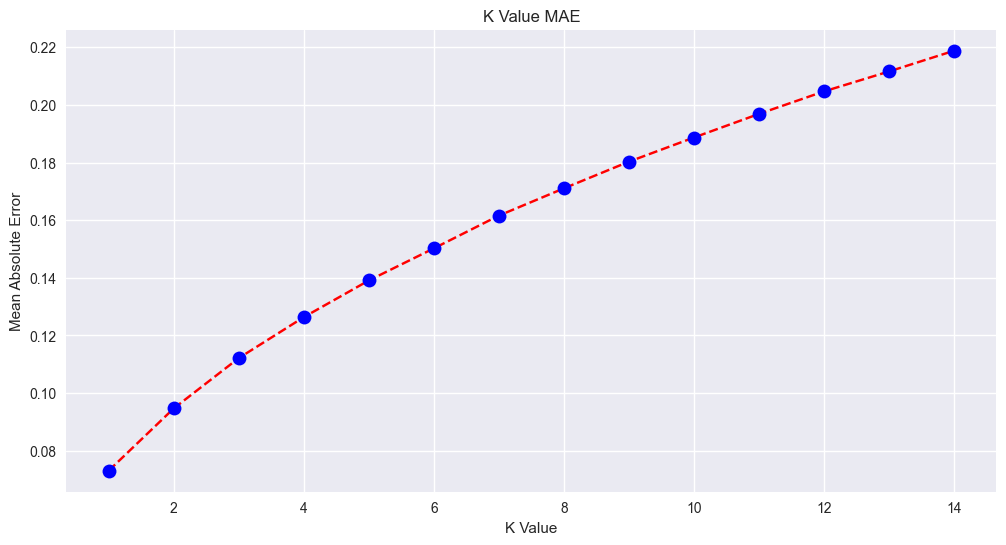

In [96]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 15), error[:14], color='red', 
         linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('K Value MAE')
plt.xlabel('K Value')
plt.ylabel('Mean Absolute Error')

In [97]:
print(min(error))               # 0.43631325936692505
print(np.array(error).argmin()) # 11

0.0730364690848324
0


In [101]:
knn_reg12 = KNeighborsRegressor(n_neighbors=2)
knn_reg12.fit(X_train, y_train)
y_pred12 = knn_reg12.predict(X_test)
r2 = knn_reg12.score(X_test, y_test) 

mae12 = mean_absolute_error(y_test, y_pred12)
mse12 = mean_squared_error(y_test, y_pred12)
rmse12 = mean_squared_error(y_test, y_pred12, squared=False)
print(f'r2: {r2}, \nmae: {mae12} \nmse: {mse12} \nrmse: {rmse12}')

r2: 0.6946429797377389, 
mae: 0.09466234149218519 
mse: 0.07632949965595202 
rmse: 0.27627793914091664


In [103]:
from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier()
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [104]:
y_pred = classifier.predict(X_test)


In [105]:
acc =  classifier.score(X_test, y_test)
print(acc) # 0.6191860465116279

0.8672957829548805


In [106]:
from sklearn.metrics import f1_score

f1s = []

# Calculating f1 score for K values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    # using average='weighted' to calculate a weighted average for the 4 classes 
    f1s.append(f1_score(y_test, pred_i, average='weighted'))

Text(0, 0.5, 'F1 Score')

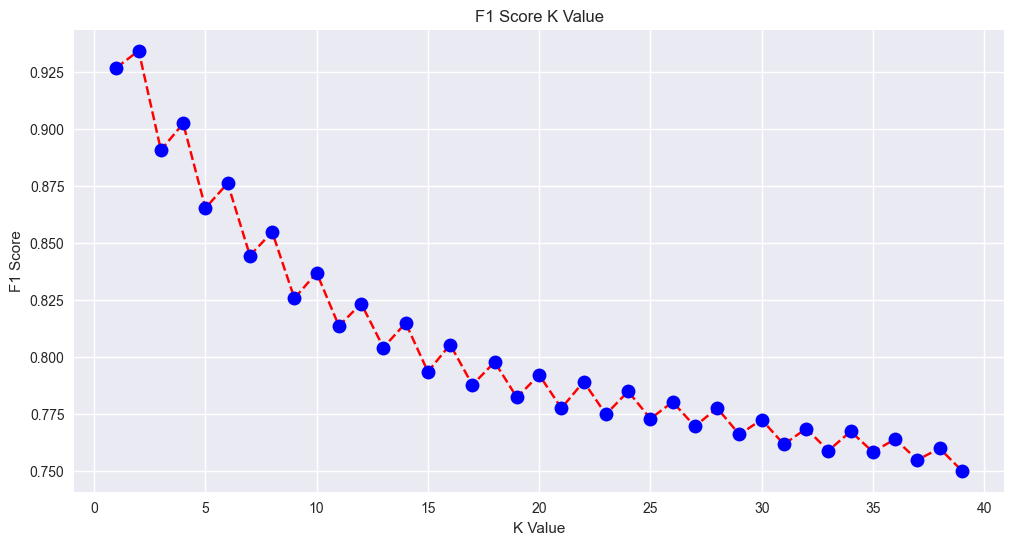

In [107]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), f1s, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('F1 Score K Value')
plt.xlabel('K Value')
plt.ylabel('F1 Score')

In [110]:
classifier15 = KNeighborsClassifier(n_neighbors=12)
classifier15.fit(X_train, y_train)
y_pred15 = classifier15.predict(X_test)
print(classification_report(y_test, y_pred15))

              precision    recall  f1-score   support

           0       0.98      0.67      0.80      5144
           1       0.75      0.99      0.85      5029

    accuracy                           0.83     10173
   macro avg       0.86      0.83      0.82     10173
weighted avg       0.87      0.83      0.82     10173



## Getting our predictions

In [120]:
knn.score(X_test,y_test)

0.7591664209181166

In [121]:
from sklearn.cluster import KMeans


In [122]:
model = KMeans(n_clusters=4)


In [127]:
model.fit(oversampled_data[0])


KeyError: 0

In [126]:
raw_data

(array([[ 5.23703209e+00, -2.01635655e+00],
        [ 8.04079159e+00,  1.43143520e+00],
        [ 8.93159145e+00, -9.47766614e-02],
        [ 8.87582975e+00,  1.20887077e+00],
        [ 1.11684311e+00,  5.90870085e+00],
        [-1.55235036e-02,  5.04284627e+00],
        [ 8.08585647e+00,  2.06752487e-01],
        [-6.09935380e+00, -8.77385969e+00],
        [ 8.29143265e+00,  4.33904230e-01],
        [ 1.12284949e+01, -1.52316972e+00],
        [ 9.95205435e+00,  1.90759944e+00],
        [-3.37781827e+00, -6.34851516e+00],
        [ 1.12864427e+01, -2.86632154e+00],
        [-2.53874668e+00, -9.09366334e+00],
        [ 8.49724284e+00,  2.31910138e-01],
        [ 8.73776695e+00,  4.03473775e-01],
        [ 7.81122904e+00, -2.82864783e+00],
        [-3.65399280e+00,  2.20056997e+00],
        [ 2.31367736e-01,  5.39949800e+00],
        [ 9.91802093e+00, -8.12462974e-01],
        [ 1.40932451e+00,  3.01865572e+00],
        [ 8.44403455e+00, -1.93536666e+00],
        [-1.73962642e+00,  1.288

In [124]:
model.labels_


array([2, 2, 2, 2, 1, 1, 2, 0, 2, 2, 2, 0, 2, 0, 2, 2, 2, 3, 1, 2, 1, 2,
       3, 2, 0, 1, 1, 2, 0, 0, 0, 3, 1, 3, 0, 3, 0, 2, 1, 1, 0, 2, 2, 3,
       3, 3, 2, 1, 1, 1, 1, 2, 3, 0, 0, 2, 3, 0, 1, 3, 1, 3, 3, 0, 1, 1,
       1, 3, 3, 1, 2, 1, 1, 3, 3, 1, 2, 1, 2, 1, 2, 0, 0, 2, 2, 2, 2, 3,
       2, 2, 1, 0, 0, 0, 2, 1, 0, 2, 1, 0, 1, 1, 1, 0, 0, 1, 3, 1, 1, 1,
       3, 2, 1, 1, 2, 0, 3, 2, 1, 0, 2, 3, 2, 2, 3, 2, 1, 0, 0, 0, 0, 3,
       1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 3, 3, 3, 0, 2, 1, 0, 0, 0, 0, 2, 2,
       1, 3, 1, 1, 3, 1, 1, 3, 1, 1, 1, 2, 0, 1, 3, 0, 3, 1, 2, 1, 1, 2,
       0, 3, 0, 1, 0, 0, 0, 3, 0, 3, 2, 2, 0, 3, 0, 3, 3, 1, 2, 0, 3, 3,
       2, 1], dtype=int32)

## Getting the error metrics of our K-NN model

In [83]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

MAE = mean_absolute_error(y_test,knn_predictions)
MSE = mean_squared_error(y_test,knn_predictions)
RMSE = np.sqrt(MSE)
R2 = r2_score(y_test,knn_predictions)

print("The mean absolute error of the model in the test set is: %6.2f" % (MAE))
print("The mean absolute error of the model in the test set is: " , MAE)
print("The mean squared error of the model in the test set is: %6.2f" % (MSE))
print("The root mean squared error of the model in the test set is: %6.2f" % (RMSE))
print("The R2 of the model in the test set is: %4.2f" % (R2))

The mean absolute error of the model in the test set is:   0.13
The mean absolute error of the model in the test set is:  0.12633932959795538
The mean squared error of the model in the test set is:   0.09
The root mean squared error of the model in the test set is:   0.30
The R2 of the model in the test set is: 0.64


The KNN model appears to have performed reasonably well on the test set. The MAE and RMSE are relatively low, indicating that the model's predictions are fairly accurate. 

The R2 value of 0.64 suggests that the model explains about 64% of the variation in the dependent variable.

Plotting R squared

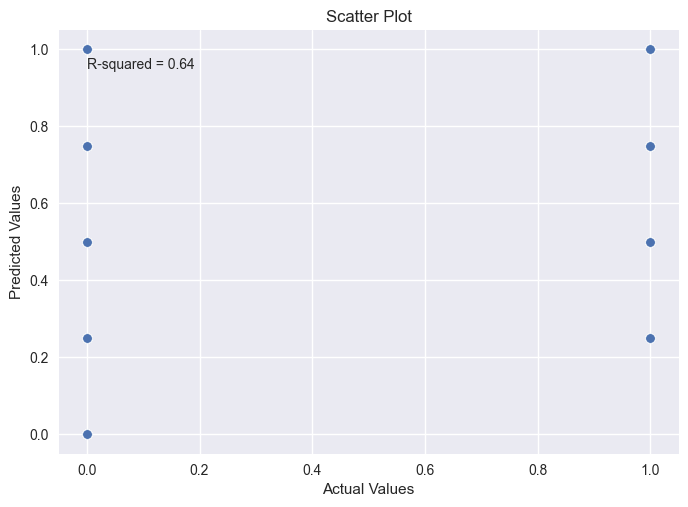

In [84]:
#sns.scatterplot(y = knn_predictions, x = y_test)



# Plot scatter plot
sns.scatterplot(x=y_test, y=knn_predictions)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Scatter Plot')

# Add R-squared value to plot
plt.text(y_test.min(), knn_predictions.max()*0.95, f"R-squared = {R2:.2f}")

# Show the plot
plt.show()

# Getting the best k

Let's try to find the best K value from a pre-defined set of values.

In [92]:
scores = [] # We will store here the R2 values for each of our K-NN models with different K-values.
for i in range(2,20): # The values of K. = 2,3,4,5,6,7,8,9
    model = KNeighborsRegressor(n_neighbors=i)
    model.fit(X_train, y_train)
    scores.append(model.score(X_test, y_test))

Now let's plot how it changes the score as a function of K.

Text(0, 0.5, 'R2')

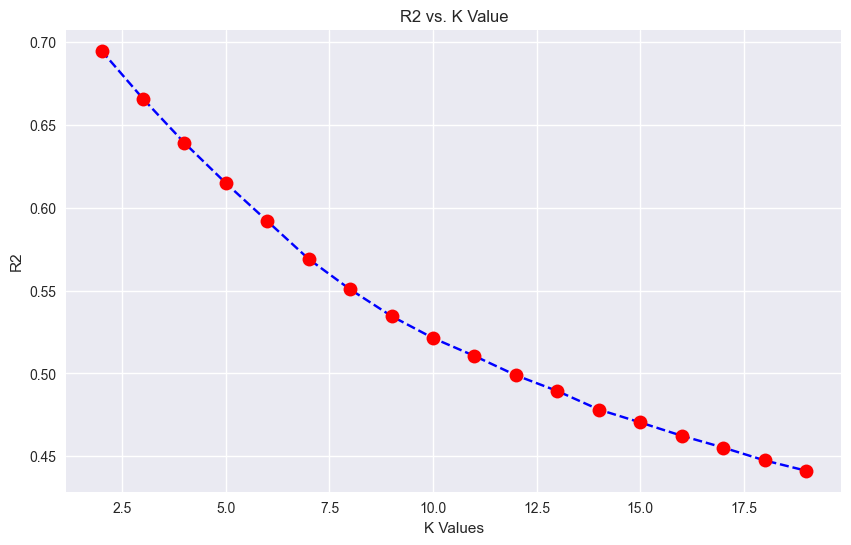

In [93]:
plt.figure(figsize=(10,6))
plt.plot(range(2,20), scores, color = 'blue', linestyle='dashed',
         marker='o', markerfacecolor='red', markersize=10)
plt.title('R2 vs. K Value')
plt.xlabel('K Values')
plt.ylabel('R2')

#threshold = 0.01 # minimum difference we want between two R2 consecutive values.
#delta = 10. # difference between two consecutive R2 values.
#k = 3 # initival value
#old_score = 0.

#while (delta >= threshold):
#  knn_model = KNeighborsRegressor(n_neighbors=k) # The keyword "n_neighbors" is what sets the K.
#  knn_model.fit(X_train, y_train)
#  knn_predictions = knn_model.predict(X_test) 
#  new_score = r2_score(y_test,knn_predictions)
#  delta = new_score - old_score
#  k = k + 4 
#  old_score = new_score

In [19]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print('Mean Absolute Error:', round(metrics.mean_absolute_error(y_test, y_pred),2))
print('Mean Squared Error:', round(metrics.mean_squared_error(y_test, y_pred),2))
print('Root Mean Squared Error:', round(np.sqrt(metrics.mean_squared_error(y_test, y_pred)),2))
print('R2:', round(metrics.r2_score(y_test, y_pred),2))
print('Adjusted R:', round( 1 - (1-metrics.r2_score(y_test, y_pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1),2))

Mean Absolute Error: 0.39
Mean Squared Error: 0.19
Root Mean Squared Error: 0.44
R2: 0.22
Adjusted R: 0.22


The Linear Regression model performs worse than the KNN model, with a higher MAE, MSE, RMSE, and a lower R2 score. 

The Adjusted R-squared value is the same as the R-squared value in this case, which means that none of the predictors are contributing significantly to the model.

In [25]:
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy: {:.2f}".format(accuracy))
print("Precision: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))
print("F1-score: {:.2f}".format(f1))

Accuracy: 0.70
Precision: 0.68
Recall: 0.74
F1-score: 0.71


Very similar to the linear regression that we did on data imbalance